# Simulator 

This is a demo.

In [2]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
from simulator import dropletFormation, absoluteLS, LS_recession, generate_alpha_arr, cell_probV, simulate_UMIs
warnings.filterwarnings('ignore')

## Part 1: pre-simulation

mRNA capture curve

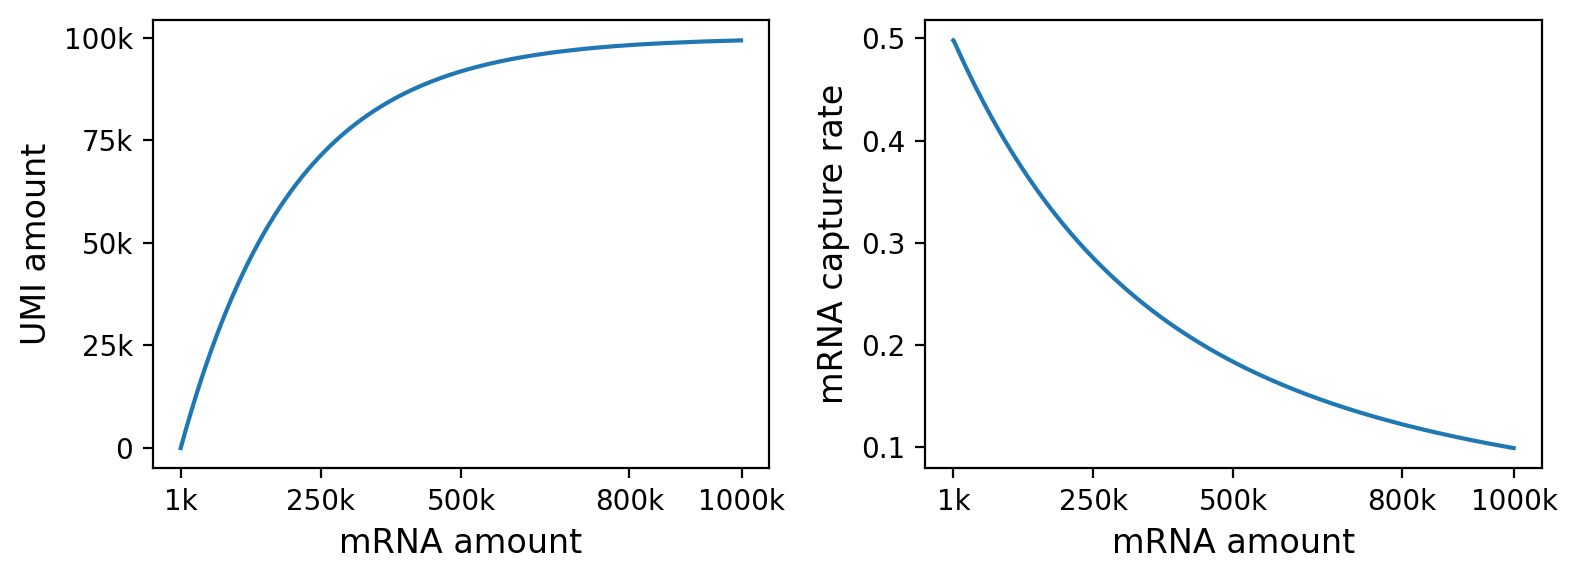

In [3]:
x = np.arange(0,1000000,1000)
y = [LS_recession(i) for i in x]

plt.figure(figsize=(8,3),dpi=200)
plt.subplot(1,2,1)
plt.plot(x, y)
plt.xticks([1000,250000,500000,800000,1000000],['1k','250k','500k','800k','1000k'])
plt.yticks([0,25000,50000,75000,100000],['0','25k','50k','75k','100k'])
plt.xlabel('mRNA amount',fontsize=12)
plt.ylabel('UMI amount',fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, y/x)
plt.xticks([1000,250000,500000,800000,1000000],['1k','250k','500k','800k','1000k'])
plt.xlabel('mRNA amount',fontsize=12)
plt.ylabel('mRNA capture rate',fontsize=12)
plt.tight_layout()
plt.show()

parameters to generate doublets

In [4]:
sample_component = [[1000,1000,1000],[1000,1000,1000],[1000,1000,1000]]
logLS_m = [4, 4.2, 4.5]
logLS_std = [0.2, 0.2, 0.2]

superparameter

In [5]:
alpha_arr = generate_alpha_arr(sample_component, 
                               precision=[60000, 50000, 40000],
                               num_genes=10000,
                               n_diff_genes=1000)

### Cell type difference (Alpha)

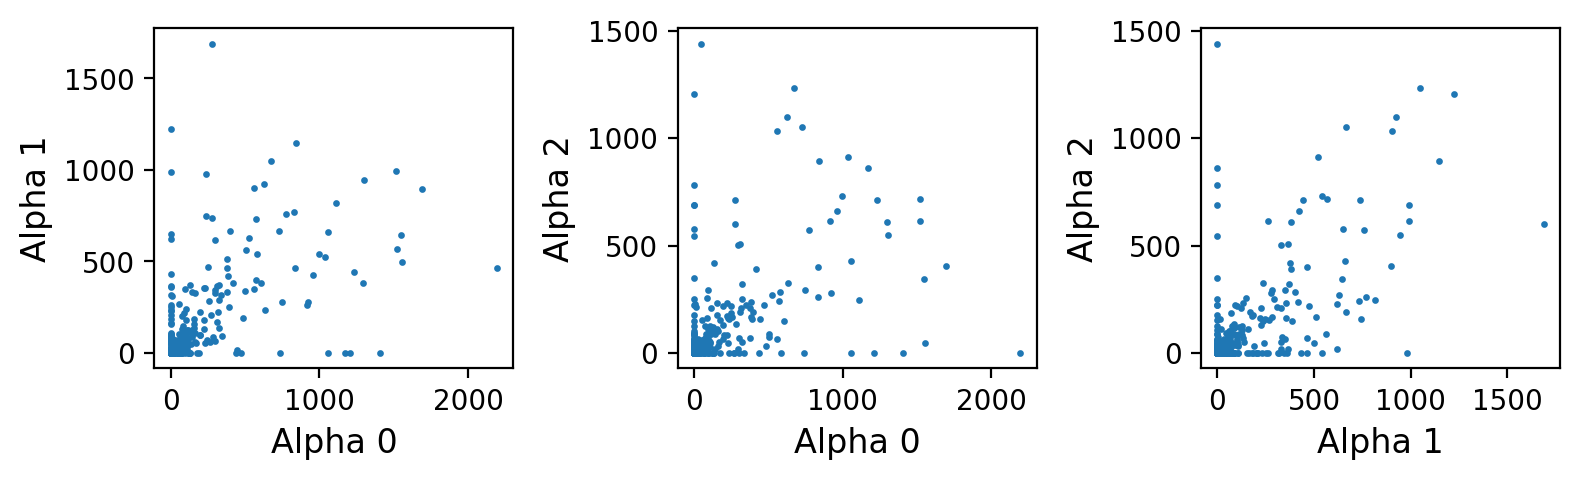

In [10]:
plt.figure(figsize=(8,2.5),dpi=200)

plt.subplot(1,3,1)
plt.scatter(alpha_arr[0],alpha_arr[1],s=2)
plt.xlabel('Alpha 0',fontsize=12)
plt.ylabel('Alpha 1',fontsize=12)

plt.subplot(1,3,2)
plt.scatter(alpha_arr[0],alpha_arr[2],s=2)
plt.xlabel('Alpha 0',fontsize=12)
plt.ylabel('Alpha 2',fontsize=12)

plt.subplot(1,3,3)
plt.scatter(alpha_arr[1],alpha_arr[2],s=2)
plt.xlabel('Alpha 1',fontsize=12)
plt.ylabel('Alpha 2',fontsize=12)

plt.tight_layout()
plt.show()

### Cell type difference (mRNA amount)

In [7]:
cell_LS = absoluteLS(sample_component, logLS_m, logLS_std)

In [8]:
n_celltype = len(sample_component[0])
cell_LS_dic = {}
idx = 0
for hto in sample_component:
    for c in range(n_celltype):
        if c not in cell_LS_dic:
            cell_LS_dic[c] = list(cell_LS[idx:(idx+hto[c])])
        else:
            cell_LS_dic[c].extend(list(cell_LS[idx:(idx+hto[c])]))
        idx += hto[c]

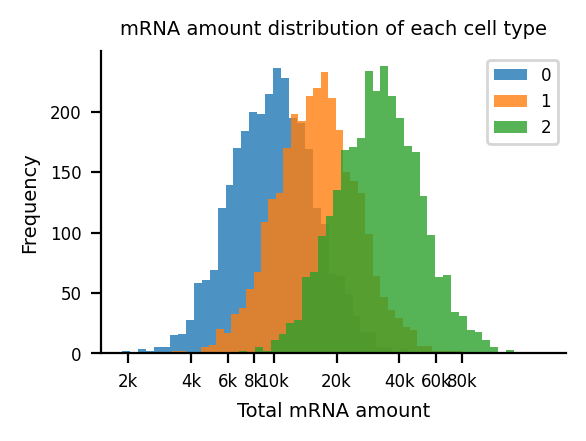

In [9]:
xticks = np.array([3,np.log10(2000),np.log10(4000),np.log10(6000),np.log10(8000),4,\
          np.log10(20000),np.log10(40000),np.log10(60000),np.log10(80000)])#,5])
xannos = np.array(['1k','2k','4k','6k','8k','10k','20k','40k','60k','80k'])#,'100k'])
xidx = [i for i in range(len(xticks)) if xticks[i] > np.log10(cell_LS.min()) and xticks[i] < np.log10(cell_LS.max())]

plt.figure(figsize=(3,2),dpi=200)
ax=plt.subplot()
for c in range(n_celltype):
    plt.hist(np.log10(cell_LS_dic[c]), bins='auto', label=c, alpha=0.8)
plt.legend(loc='upper right',fontsize=6)
plt.xticks(xticks[xidx], xannos[xidx])
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Total mRNA amount',fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.xticks(xticks[xidx], xannos[xidx],fontsize=6)
plt.yticks(fontsize=6)
plt.title('mRNA amount distribution of each cell type',fontsize=7)
plt.show()

In [10]:
droplets = dropletFormation(sample_component)
droplets['tot_mRNA'] = [sum(cell_LS[d]) for d in droplets['component']]
droplets['ls'] = [LS_recession(N) for N in droplets['tot_mRNA'] ]

### captured UMIs

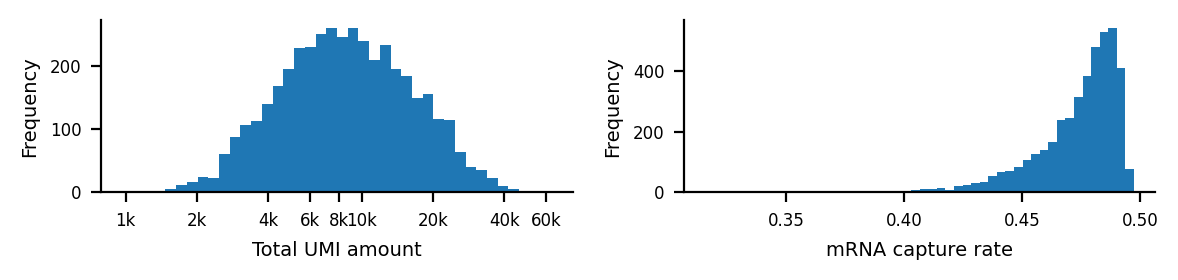

In [11]:
plt.figure(figsize=(6,1.5),dpi=200)

xidx = [i for i in range(len(xticks)) if xticks[i] > np.log10(droplets['ls'].min()) 
        and xticks[i] < np.log10(droplets['ls'].max())]

ax = plt.subplot(1,2,1)
plt.hist(np.log10(droplets['ls']), 40)
plt.xlabel('Total UMI amount',fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.xticks(xticks[xidx], xannos[xidx],fontsize=6)
plt.yticks(fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
plt.hist(droplets['ls'] / droplets['tot_mRNA'], 50)
plt.xlabel('mRNA capture rate',fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


## Part 2: simulation demo

parameters

In [3]:
sample_component = [[1000,1000,1000],[1000,1000,1000],[1000,1000,1000]]
logLS_m = [4, 4.2, 4.5]
logLS_std = [0.2, 0.2, 0.2]
num_genes = 10000

superparameter

In [4]:
alpha_arr = generate_alpha_arr(sample_component, 
                               precision=[60000, 50000, 40000],
                               num_genes=10000,
                               n_diff_genes=1000)

### droplet formation process

In [6]:
droplets = dropletFormation(sample_component)
cell_LS = absoluteLS(sample_component, logLS_m, logLS_std)

droplets['tot_mRNA'] = [sum(cell_LS[d]) for d in droplets['component']]

### mRNA sampling process

In [7]:
droplets['ls'] = [LS_recession(N) for N in droplets['tot_mRNA'] ]
cell_pmat = cell_probV(alpha_arr, sample_component)
UMI_mat = simulate_UMIs(cell_pmat, droplets, logLS_m)

output (UMI_mat, droplets) 

In [8]:
droplets.head(20)

,component,num_cells,HTO,cell_type,tot_mRNA,ls
1,[1],1,[0],[0],6365,3132
4,[4],1,[0],[0],12361,5993
8,[8],1,[0],[0],8810,4309
9,[9],1,[0],[0],9432,4606
10,[10],1,[0],[0],15790,7591
12,[12],1,[0],[0],14377,6936
14,[14],1,[0],[0],8605,4211
17,[17],1,[0],[0],5921,2917
18,[18],1,[0],[0],13539,6545
19,[19],1,[0],[0],11338,5511


In [9]:
UMI_mat.shape

(4222, 10000)